In [1]:
%pip install matplotlib seaborn pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual para que los gráficos se vean bien
sns.set(style="whitegrid")

# 1. Cargar los datos (Esto puede tardar unos segundos, son +500k filas)
# Nota: Si tu archivo es .csv usa read_csv, si es excel usa read_excel
try:
    print("⏳ Cargando dataset... Paciencia, son muchos datos.")
    df = pd.read_csv('data.csv', encoding='ISO-8859-1') # El encoding es vital en este dataset
    print("✅ ¡Carga Exitosa!")
except FileNotFoundError:
    print("❌ Error: No encuentro el archivo 'data.csv'. Revisa el nombre.")

# 2. Ver las primeras 5 filas (El equivalente a SELECT * LIMIT 5)
display(df.head())

# 3. Auditoría Rápida (Info técnica)
print(f"\nDimensiones del Dataset: {df.shape}")
df.info()

Matplotlib is building the font cache; this may take a moment.


⏳ Cargando dataset... Paciencia, son muchos datos.
❌ Error: No encuentro el archivo 'data.csv'. Revisa el nombre.


NameError: name 'df' is not defined

In [1]:
import os

print("📂 Directorio actual de trabajo:", os.getcwd())
print("\n📄 Archivos que veo aquí dentro:")
for archivo in os.listdir():
    print(f" - {archivo}")

📂 Directorio actual de trabajo: c:\Proyectos AWS\Ecommerce_RFM_Project

📄 Archivos que veo aquí dentro:
 - analysis.ipynb
 - data.csv


In [2]:
import pandas as pd

print("📂 Intentando leer 'data.csv'...")

try:
    # Intentamos leerlo como CSV con el encoding estándar para este dataset
    df = pd.read_csv('data.csv', encoding='ISO-8859-1')
    print("✅ ¡Éxito! Archivo cargado como CSV.")
    
except UnicodeDecodeError:
    # Si falla el encoding, probamos con otro común
    print("⚠️ Error de encoding. Probando con 'utf-8'...")
    df = pd.read_csv('data.csv', encoding='utf-8')
    print("✅ ¡Éxito con UTF-8!")

except pd.errors.ParserError:
    print("❌ Error: El archivo parece estar dañado o NO es un CSV (quizás es un Excel renombrado).")

# Si llegamos aquí, mostramos la victoria
print(f"\n📊 Dimensiones del Dataset: {df.shape}")
print(f"Columnas encontradas: {list(df.columns)}")
display(df.head())

📂 Intentando leer 'data.csv'...
✅ ¡Éxito! Archivo cargado como CSV.

📊 Dimensiones del Dataset: (541909, 8)
Columnas encontradas: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# --- AUDITORÍA INICIAL ---
print("🔍 --- Auditoría Previa ---")
print(f"Valores nulos por columna:\n{df.isnull().sum()}")

# 1. Eliminar filas sin CustomerID (No podemos segmentar clientes que no existen)
# 'inplace=True' significa que guardamos el cambio en el mismo dataframe
df.dropna(subset=['CustomerID'], inplace=True)

# 2. Filtrar devoluciones (Quantity negativo) y errores (UnitPrice negativo o cero)
# Nos quedamos solo con Quantity > 0 y UnitPrice > 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 3. Convertir InvoiceDate a formato de Fecha Real (Datetime)
# Esto es vital para calcular hace cuántos días fue la última compra
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 4. Crear columna de 'Total' (Venta total por fila)
# RFM necesita el valor monetario: Cantidad * Precio Unitario
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# --- RESULTADO FINAL ---
print("\n🧹 --- Auditoría Posterior a Limpieza ---")
print(f"Nuevas Dimensiones: {df.shape}")
print(f"Rango de Fechas: {df['InvoiceDate'].min()} a {df['InvoiceDate'].max()}")
print("\n✅ Muestra de los datos limpios:")
display(df.head())

🔍 --- Auditoría Previa ---
Valores nulos por columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

🧹 --- Auditoría Posterior a Limpieza ---
Nuevas Dimensiones: (397884, 9)
Rango de Fechas: 2010-12-01 08:26:00 a 2011-12-09 12:50:00

✅ Muestra de los datos limpios:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
# 1. Definir la fecha de análisis (El día después del último dato)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"📅 Fecha de Corte para el análisis: {snapshot_date}")

# 2. Agrupar por Cliente (La operación más potente de Pandas)
# Calculamos las 3 métricas de una sola vez
rfm = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency: Días desde la última compra
    'InvoiceNo': 'nunique',                                  # Frequency: Conteo de facturas únicas
    'TotalAmount': 'sum'                                     # Monetary: Suma del dinero gastado
})

# 3. Renombrar columnas para que se vea profesional
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

# 4. Ver los primeros 5 "Clientes VIP" (o no tanto)
print("\n🏆 Tabla RFM Calculada:")
display(rfm.head())

# 5. Estadística descriptiva (Para detectar Big Spenders)
display(rfm.describe())

📅 Fecha de Corte para el análisis: 2011-12-10 12:50:00

🏆 Tabla RFM Calculada:


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


In [5]:
# --- SCORING (CALIFICACIÓN) ---

# 1. Crear etiquetas para los puntajes (1 a 4)
r_labels = range(4, 0, -1) # Recency es inverso: 4 es el más reciente (mejor), 1 es el más antiguo
f_labels = range(1, 5)     # Frequency: 1 es poco, 4 es mucho
m_labels = range(1, 5)     # Monetary: 1 es pobre, 4 es rico

# 2. Dividir en cuartiles (4 grupos iguales)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=f_labels) # .rank para manejar empates
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

# 3. Concatenar para crear el "RFM Score" final (Ej: "444" es el cliente perfecto)
rfm['RFM_Group'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# 4. Sumar puntaje para tener un "Score Total" (De 3 a 12 puntos)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# 5. Ver el resultado final
print("✅ Segmentación Completada. Muestra de clientes calificados:")
display(rfm.head())

✅ Segmentación Completada. Muestra de clientes calificados:


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,7,4310.00,4,4,4,444,12
12348.0,75,4,1797.24,2,3,4,234,9
12349.0,19,1,1757.55,3,1,4,314,8
12350.0,310,1,334.40,1,1,2,112,4


✅ Clientes Etiquetados:


,Recency,RFM_Group,Segment
CustomerID,,,
12346.0,326,114,Hibernating
12347.0,2,444,Champions
12348.0,75,234,At Risk
12349.0,19,314,Potential Loyalist
12350.0,310,112,Hibernating
12352.0,36,344,Loyal Customers
12353.0,204,111,Hibernating
12354.0,232,113,Hibernating
12355.0,214,112,Hibernating


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\870965878.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')


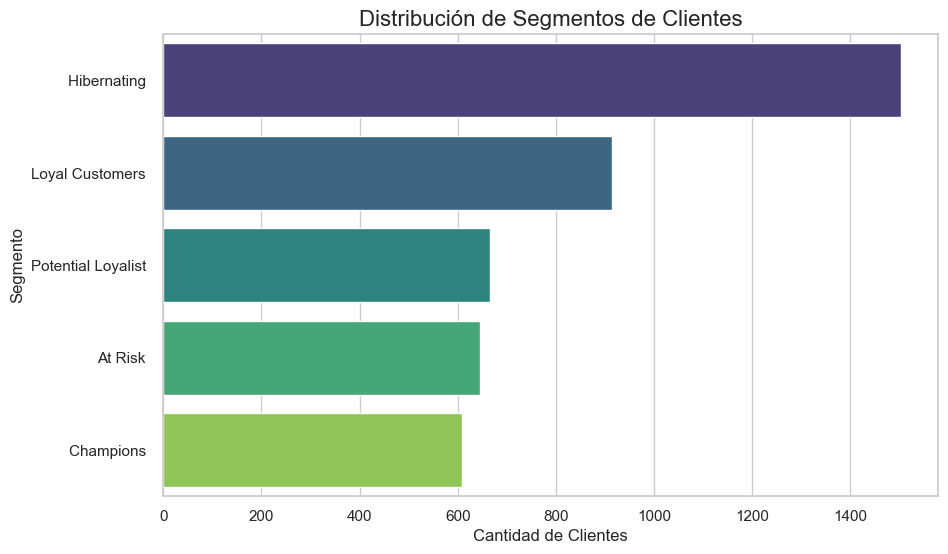

In [9]:
# --- SEGMENTACIÓN DE MARKETING ---

def get_segment(row):
    # Convertimos a enteros por si acaso
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])
    
    # Lógica de Segmentación (Reglas de Negocio)
    if r >= 4 and f >= 4:
        return 'Champions '       # Compraron hace poco, compran seguido y gastan mucho
    elif r >= 3 and f >= 3:
        return 'Loyal Customers ' # Buenos clientes regulares
    elif r >= 3 and f >= 1:
        return 'Potential Loyalist ' # Nuevos con potencial
    elif r == 4 and f == 1:
        return 'Recent Users '    # Acaban de llegar
    elif r <= 2 and f >= 3:
        return 'At Risk '         # Compraban seguido, pero hace mucho no vienen (¡Peligro!)
    elif r == 1 and f >= 4:
        return 'Cant Lose Them '  # VIPs que se están yendo
    elif r <= 2 and f <= 2:
        return 'Hibernating '     # Hace mucho no vienen y compraban poco
    else:
        return 'About to Sleep '  # En el limbo

# Aplicamos la función fila por fila
rfm['Segment'] = rfm.apply(get_segment, axis=1)

# Verificamos los resultados
print("✅ Clientes Etiquetados:")
display(rfm[['Recency', 'RFM_Group', 'Segment']].head(10))

# --- VISUALIZACIÓN FINAL (El Gráfico para el Portafolio) ---
plt.figure(figsize=(10, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Distribución de Segmentos de Clientes', fontsize=16)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Segmento')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\3441391320.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\p

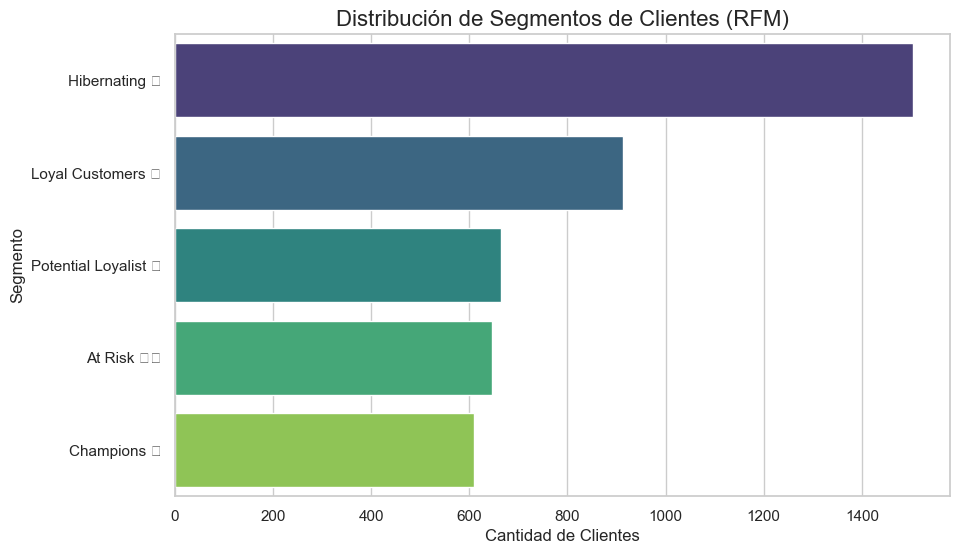

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo (opcional, para que se vea bonito)
sns.set(style="whitegrid")

# --- VISUALIZACIÓN FINAL ---
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras horizontales
sns.countplot(
    y='Segment', 
    data=rfm, 
    order=rfm['Segment'].value_counts().index, 
    palette='viridis'
)

plt.title('Distribución de Segmentos de Clientes (RFM)', fontsize=16)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Segmento')

# Mostramos el gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\590751859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\590751859.py:9: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\590751859.py:9: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\590751859.py:9: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) Arial.
  plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')
C:\Users\Usuario\AppData\Local\Temp\ipyke

📸 Gráfico guardado como 'rfm_segments.png'


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages

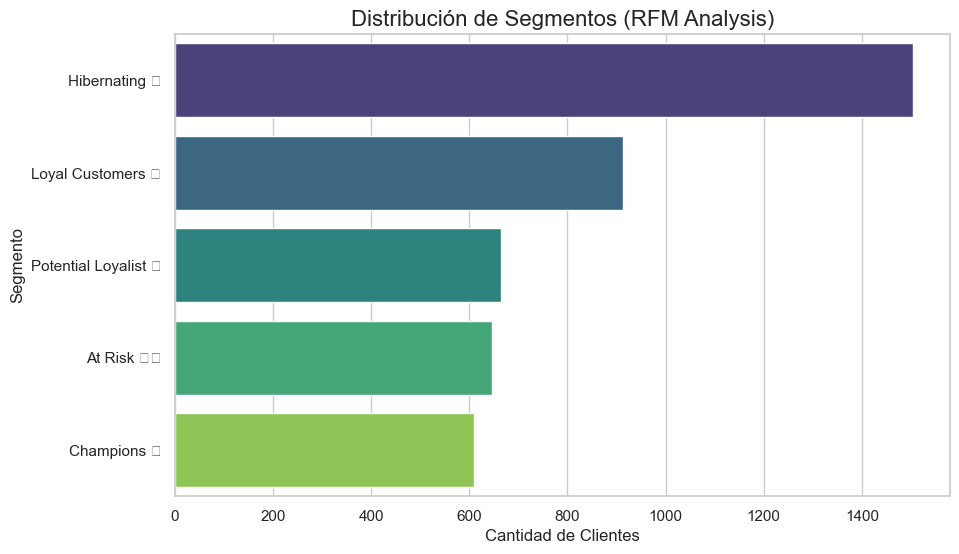

In [8]:
# Guardar el gráfico en alta calidad
plt.figure(figsize=(10, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Distribución de Segmentos (RFM Analysis)', fontsize=16)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Segmento')

# Esta es la línea mágica
plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')
print("📸 Gráfico guardado como 'rfm_segments.png'")

✅ Clientes Etiquetados:


,Recency,RFM_Group,Segment
CustomerID,,,
12346.0,326,114,Hibernating
12347.0,2,444,Champions
12348.0,75,234,At Risk
12349.0,19,314,Potential Loyalist
12350.0,310,112,Hibernating
12352.0,36,344,Loyal Customers
12353.0,204,111,Hibernating
12354.0,232,113,Hibernating
12355.0,214,112,Hibernating


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\870965878.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')


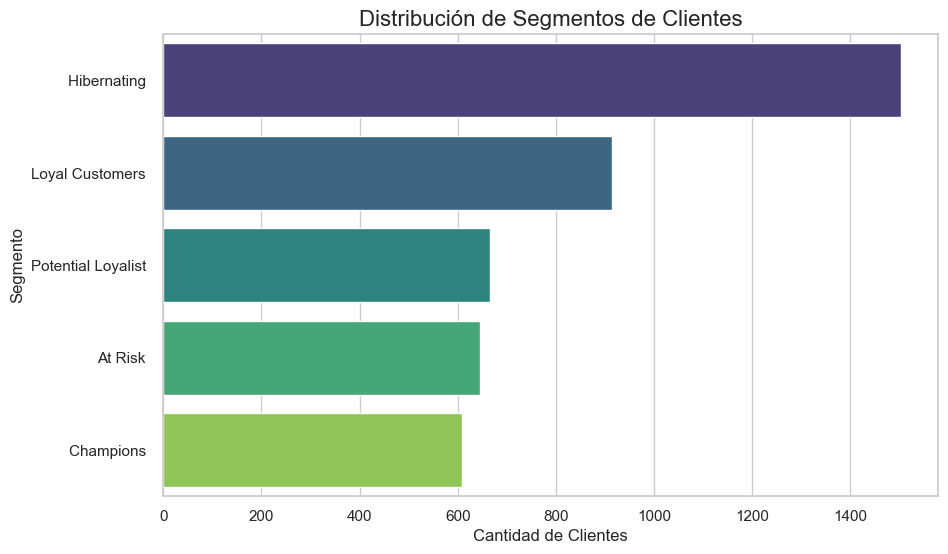

In [10]:
# --- SEGMENTACIÓN DE MARKETING ---

def get_segment(row):
    # Convertimos a enteros por si acaso
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])
    
    # Lógica de Segmentación (Reglas de Negocio)
    if r >= 4 and f >= 4:
        return 'Champions '       # Compraron hace poco, compran seguido y gastan mucho
    elif r >= 3 and f >= 3:
        return 'Loyal Customers ' # Buenos clientes regulares
    elif r >= 3 and f >= 1:
        return 'Potential Loyalist ' # Nuevos con potencial
    elif r == 4 and f == 1:
        return 'Recent Users '    # Acaban de llegar
    elif r <= 2 and f >= 3:
        return 'At Risk '         # Compraban seguido, pero hace mucho no vienen (¡Peligro!)
    elif r == 1 and f >= 4:
        return 'Cant Lose Them '  # VIPs que se están yendo
    elif r <= 2 and f <= 2:
        return 'Hibernating '     # Hace mucho no vienen y compraban poco
    else:
        return 'About to Sleep '  # En el limbo

# Aplicamos la función fila por fila
rfm['Segment'] = rfm.apply(get_segment, axis=1)

# Verificamos los resultados
print("✅ Clientes Etiquetados:")
display(rfm[['Recency', 'RFM_Group', 'Segment']].head(10))

# --- VISUALIZACIÓN FINAL (El Gráfico para el Portafolio) ---
plt.figure(figsize=(10, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Distribución de Segmentos de Clientes', fontsize=16)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Segmento')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8840\590751859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')


📸 Gráfico guardado como 'rfm_segments.png'


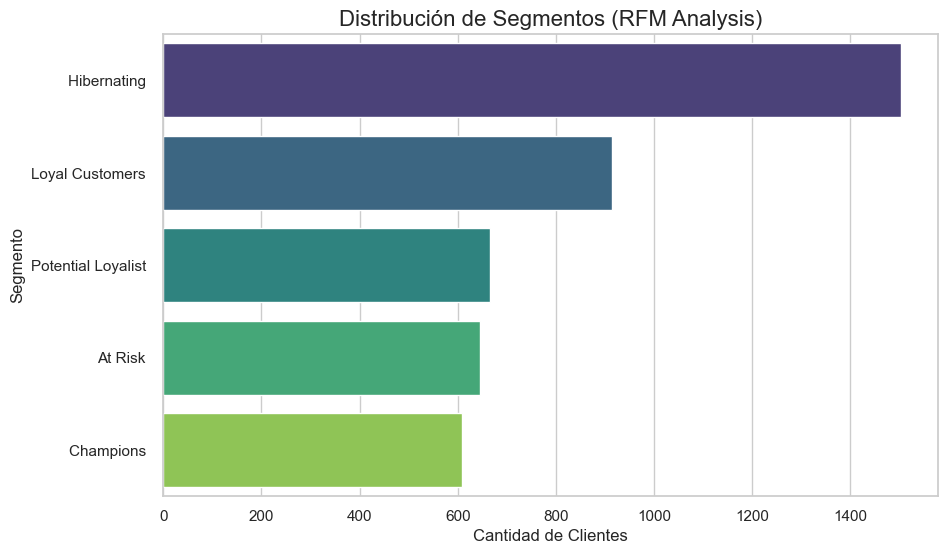

In [11]:
# Guardar el gráfico en alta calidad
plt.figure(figsize=(10, 6))
sns.countplot(y='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='viridis')
plt.title('Distribución de Segmentos (RFM Analysis)', fontsize=16)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Segmento')

# Esta es la línea mágica
plt.savefig('rfm_segments.png', dpi=300, bbox_inches='tight')
print("📸 Gráfico guardado como 'rfm_segments.png'")